### CS4423 - Networks
Prof. Götz Pfeiffer<br />
School of Mathematics, Statistics and Applied Mathematics<br />
NUI Galway

#### 1. Graphs and Graph Theory

# Lecture 8: Graph Isomorphism and Symmetries

[![Vitruvian](images/Da_Vinci.jpg)](https://en.wikipedia.org/wiki/Vitruvian_Man)

Two graphs $G = (X, E)$ and $H = (Y, F)$ are said to be **isomorphic** if there
is an edge preserving bijection between their vertex sets $X$ and $Y$.

[Deciding graph isomorphism](https://en.wikipedia.org/wiki/Graph_isomorphism_problem)
is computationally hard.

An isomorphism of a graph $G$ with itself is called an **automorphism**,
or a symmetry of $G$.

We will apply BFS to the problem of computing the **group** of all
automorphisms of a given tree.

Symmetries, or the lack thereof, are interesting properties of networks ...

In random selections, for example of trees on $n$ vertices, it turns out that
more symmetric species are less frequently picked ... 

In [1]:
import networkx as nx
from queue import Queue
opts = { "with_labels": True, "node_color": 'y'}

**Example.** According to Cayley's formula, there are $4^{4-2} = 16$
trees on $n = 4$ vertices.  But overall, we only see $2$
distinct structures, a **path graph** of length $3$, and a **star graph**
with $3$ spikes.

These structures are known as **unlabelled trees**
(as opposed to a **labelled tree**, where each node corresponds to
a specific element of $\{0, \dots, n{-}1\}$).

As a random graph, the path graph occurs far more often than
the star graph.  Is something wrong with the assumption of uniform
distribution?

In [2]:
n = 4
T = nx.random_tree(n)
nx.draw(T)

No, there isn't.  It's just that the line **shape** appears more often than the
star **shape** in the full list of all **labelled** graphs on 4 points.

![4-trees](images/t4.png)

## Graph Isomorphism

If we are mainly interested in the network **structure**
of a graph $G = (X, E)$, the underlying vertex set $X$ is replacable.
The following definition makes this notion precise.

<div class="alert alert-danger">

<b>Definition.</b>  
    <ul>
        <li> 
            Let $G_1 = (X_1, E_2)$ 
            and $G_2 = (X_2, E_2)$ be graphs.
        </li>
        <li>
            A **graph isomorphism** from $G_1$ to $G_2$
            is a **bijective** map $f \colon X_1 \to X_2$
            such that $(f(x), f(y))$ is an edge of $G_2$
            if and only if $(x, y) \in E_1$.
        </li>
        <li>
            We say that $G_1$ is isomorphic to $G_2$
            (and write $G_1 \cong G_2$) if
            there is a graph isomorphism $f$ from $G_1$ to $G_2$.
        </li>
    </ul>
</div>

* In the special case where both $X_1$ and $X_2$
  are the same set $X$,
  a bijection $f \colon X \to X$ is called
  a **permutation** of $X$.

<div class="alert alert-danger">

<b>Definition.</b>  
    A **graph automorphism** of a
            graph $G = (X, E)$ is 
    a permutation $f$ of $X$ 
    which is a graph isomorphism from $G$ to itself.
</div>

<div class="alert alert-success">

**Examples.** 
    
* Consider the bijection $f(0) = 3$, $f(1) = 5$, $f(2) = 5$,
    or $f = \bigl({}^{0\,1\,2}_{3\,4\,5}\bigr)$ for short.
    

* $f$ is a graph isomorphism
    from a graph $G$: $0 - 1 - 2$ to a graph $H$: $3 - 4 - 5$.


* But not from $G$ to $K: 5 - 3 - 4$: the $f$-image of the edge
    $1 - 2$ in $G$ is not an edge in $K$.


* The permutation $\bigl({}^{0\,1\,2}_{2\,1\,0}\bigr)$
  is a graph automorphism of $G$.


* And so is the **identity permutation** $\bigl({}^{0\,1\,2}_{0\,1\,2}\bigr)$.
    

* But not the permutation $\bigl({}^{0\,1\,2}_{1\,0\,2}\bigr)$.
    
</div>

* It takes some care to decide **equality** of graphs.
(Apparently, `networkx` does not have a function for that ...)

In [3]:
G = nx.Graph([(1,2)])
H = nx.Graph([(1,2)])

In [4]:
G == H

False

In [5]:
def is_subgraph(G, H):
    for x in G:
        if not H.has_node(x):
            return False
    for e in G.edges:
        if not H.has_edge(*e):
            return False
    return True 

def are_equal_as_graphs(G, H):
    return is_subgraph(G, H) and is_subgraph(H, G)

In [6]:
are_equal_as_graphs(G, H)

True

* **Note:** the automorphisms of a graph $G = (X, E)$ form a **group**
$\mathrm{Aut}(G)$, the **automorphism group** of $G$.

* $\mathrm{Aut}(G)$ is a subgroup of the 
**symmetric group** of $X$, the group of all permutations of $X$.

<div class="alert alert-success">

Recall that a **group** is a set $S$ together with a special **identity** element $e \in S$, an **inversion** map $i \colon S \to S$ and a **multiplication** map
$m \colon S \times S \to S$ such that
* $m(m(a,b),c) = m(a, m(b, c))$ for all $a, b, c \in S$: multiplication is associative;
* $m(a, i(a)) = m(i(a), a) = e$ for all $a \in S$;
* $m(e, a) = m(a, e) = a$ for all $a \in S$.
</div>

**Example:** The group of all permutations of the $n$-set
$X = \{0, 1, 2, \dots, n-1\}$ is called the **symmetric group** $S_n$ .

## Permutations as Tuples

*  A permutation $f$ of $X = \{0, \dots, n-1\}$
can be represented as a python tuple `t` of length $n$,
with the understanding that `t[i]` represents
$f(i)$ for $i \in X$.

* **Don't confuse** `python` **tuples with the usual cycle notation for permutations!!**

* Here, the tuples are **image lists**.

* The **identity** permutation $f(x) = x$:

In [7]:
def identity(n):
    return tuple(range(n))

In [8]:
one = identity(n)
one

(0, 1, 2, 3)

* The **transposition** $i \leftrightarrow i{+}1$:

In [9]:
def transposition(n, i):
    t = list(range(n))
    t[i], t[i+1] = t[i+1], t[i]
    return tuple(t)

In [10]:
t1 = transposition(n, 1)
t2 = transposition(n, 2)
print(t1, t2)

(0, 2, 1, 3) (0, 1, 3, 2)


* **Composition** of tuples:  $(g \circ f)(x) = g(f(x))$.

In [11]:
def composition(a, b):
    return tuple(a[k] for k in b)

* $\bigl({}^{0\,1\,2\,3}_{0\,2\,1\,3}\bigr) \circ \bigl({}^{0\,1\,2\,3}_{0\,1\,3\,2}\bigr) 
= \bigl({}^{0\,1\,2\,3}_{0\,2\,3\,1}\bigr)$,


* $\bigl({}^{0\,1\,2\,3}_{0\,1\,3\,2}\bigr) \circ \bigl({}^{0\,1\,2\,3}_{0\,2\,1\,3}\bigr)
= \bigl({}^{0\,1\,2\,3}_{0\,3\,1\,2}\bigr)$.

In [12]:
t12 = composition(t1, t2)
t12

(0, 2, 3, 1)

In [13]:
t21 = composition(t2, t1)
t21

(0, 3, 1, 2)

* **Inversion:** $f^{-1}(y) = x \iff f(x) = y$.

In [14]:
def inverse(a):
    b = list(a)
    for k, v in enumerate(a):
        b[v] = k
    return tuple(b)

* $\bigl({}^{0\,1\,2\,3}_{0\,3\,1\,2}\bigr)^{-1}
= \bigl({}^{0\,1\,2\,3}_{0\,2\,3\,1}\bigr)$

In [15]:
inverse(t21)

(0, 2, 3, 1)

In [16]:
inverse(t21) == t12

True

## Group Actions

<div class="alert alert-danger">

**Definition**.  A **group action** of a group $S$ on a set $X$
is a map $S \times X \to X$, mapping $(s, x) \mapsto s(x)$,
such that
* $e(x) = e$ for all $x \in X$;
* $b(a(x)) = m(b, a)(x)$ for all $a, b \in S$, and all $x \in X$.
</div>

**Example:** $S_n$ acts on $X = \{0, \dots, n-1\}$.

If a group $S$ acts on a set $X$ then to each point $x \in X$ are associated
* its **orbit** $S(x) = \{s(x) : s \in S\} \subseteq X$;
* its **stablizer** $S_x = \{ s \in S : s(x) = x \} \subseteq S$.

The stablizer $S_x$ is a **subgroup** of $S$.

<div class="alert alert-success">

**Orbit-Stablizer Theorem.**  $|S_x| \cdot |S(x)| = |S|$ for all $x \in X$.
</div>

* $S_n$ acts on trees with vertex set $X$  by **relabelling** the nodes.


* $S_n$ is generated by the **transpositions** of 
  consecutive numbers: $k \leftrightarrow k+1$.


* This generating set defines a **graph** on the set of all trees on $X$.


* The connected component (unlabelled graph) of a tree `T` can
  be constructed by BFS as the **orbit** of `T` under the $S_n$-action.


* As a by-product, the **automorphism group** $\mathrm{Aut}(T)$ is determined
  as the **stabilizer** of `T` in this action.
  
  
* By the Orbit-Stabilizer Theorem, the size of the automorphism group is
  **inversely proportional** to the length of the orbit:
  the more symmetric a tree is the less likely it is to be picked as a random tree.

### Orbit Algorithm

* **BFS** can enumerate the orbit of a point $x$ under a list of generators of the acting group.


* This variant of BFS is called the **orbit algorithm** in Computational Group Theory.


* The following `python` function `orbit` takes as its arguments:
    - a list `gens` of generators of a group $S$
    - the point `x` from $X$
    - a function `action` describing the action $S \times X \to X$
    - and a function `equals` for testing equality in $X$.

* In many cases, the standard `python` equals operator will work as equality test:

In [17]:
def eq(x, y):
    return x == y

* The action of permutations on points is simply tuple indexing:

In [18]:
def apply(a, x):
    return a[x]

* With `eq` as an example for the `equals` parameter, and `apply` for `action` in mind,
  here is the **orbit algorithm** as a loop (over the list `gens` of group generators)
  within a loop (over the growing orbit `xxx`).

In [19]:
def orbit(gens, x, action, equals):
    xxx = [x]
    for y in xxx:
        for a in gens:
            z = action(a, y)
            w = next((v for v in xxx if equals(v, z)), None)
            if w is None:
                xxx.append(z)
    return xxx

* The **symmetric group** $S_n$ of all permutations of $X = \{0, 1, \dots, n-1\}$ is generated by the transpositions $(i, i{+}1)$, $i = 0, \dots, n-2$.

In [20]:
swaps = [transposition(n, k) for k in range(n-1)]
swaps

[(1, 0, 2, 3), (0, 2, 1, 3), (0, 1, 3, 2)]

* Now, for example, the orbit of a single point $x \in X$
under the action of the symmetric group $S_n$ (which of course is all of $X$)
can now be computed as follows:

In [21]:
x = 1
orbit(swaps, x, apply, eq)

[1, 0, 2, 3]

* Or, regarding composition $S \times S \to S$ as an action of $S$ on itself
(check the definition!), one can enumerate the $n!$ elements of $S_n$:

In [22]:
elements = orbit(swaps, one, composition, eq)
len(elements)

24

In [23]:
print(elements)

[(0, 1, 2, 3), (1, 0, 2, 3), (0, 2, 1, 3), (0, 1, 3, 2), (2, 0, 1, 3), (1, 0, 3, 2), (1, 2, 0, 3), (0, 3, 1, 2), (0, 2, 3, 1), (2, 1, 0, 3), (3, 0, 1, 2), (2, 0, 3, 1), (1, 3, 0, 2), (0, 3, 2, 1), (1, 2, 3, 0), (3, 1, 0, 2), (3, 0, 2, 1), (2, 1, 3, 0), (2, 3, 0, 1), (1, 3, 2, 0), (3, 2, 0, 1), (3, 1, 2, 0), (2, 3, 1, 0), (3, 2, 1, 0)]


## Orbits of Isomorphic Trees

* The process of **relabelling** the nodes of a graph with vertex set
  $X$ by permutations of $X$ defines an **action** of $S_n$
  on the set of all labelled trees on $X$.

In [24]:
def relabel(a, G):
    mapping = dict(enumerate(a))
    return nx.relabel_nodes(G, mapping)

* $1_X(T) = T$ and $(g \circ f)(T) = g(f(T))$ for each tree $T$
  with vertex set $X$.

In [25]:
G = nx.path_graph(n)
G12 = relabel(t2, relabel(t1, G))
print(list(G12.nodes()))
GG = relabel(t21, G)
print(list(GG.nodes()))

[0, 3, 1, 2]
[0, 3, 1, 2]


*  Using `relabel` as action, and `are_equal_as_graphs` as equality check,
the above orbit algorithm finds the 
orbit of a tree $T$ under $S_n$,
i.e., the list of **all trees** on the vertex set $X$ that are **isomorphic** to $T$.

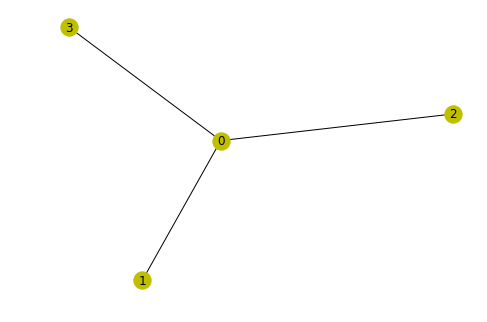

In [26]:
nx.draw(T, **opts)

In [27]:
TTT = orbit(swaps, T, relabel, are_equal_as_graphs)

In [28]:
len(TTT)

4

### Graph and Queue version

* Implicitly, the action of a group $S$ on a set $X$, with respect to
a set $A$ of generators of $S$, defines an **action graph** with vertex
set $X$, and edges $x - y$ whenever there is an element $a \in A$
with $a(x) = y$.
* Here, we need to supply and manage an explicit queue for the BFS. 

* We turn the simultaneous initialization of the queue and the graph into a small subroutine.

In [29]:
def init_Q_G(x):
    Q = Queue()
    Q.put(x)
    G = nx.Graph()
    G.add_node(x)
    return Q, G

* The following function `action_graph` is a variant of the above `orbit` function 
  that has the same set of parameters, and computes and returns the orbit
  of $x$ as a graph.

In [30]:
def action_graph(gens, x, action, equals):
    Q, G = init_Q_G(x)
    while not Q.empty():
        y = Q.get()
        for a in gens:
            z = action(a, y)
            w = next((v for v in G.nodes() if equals(v, z)), None)
            if w is None:
                Q.put(z)
                G.add_node(z)
                G.add_edge(y, z)
            else:
                G.add_edge(y, w)
    return G

* For example, the graph of the action of $S_n$ on $X = \{0, \dots, n-1\}$:

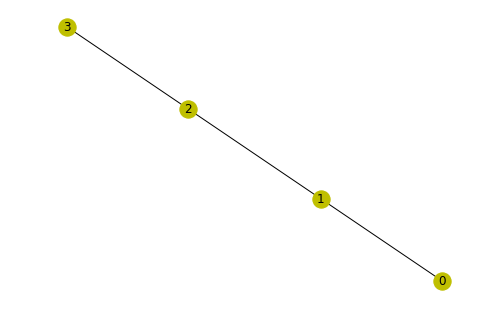

In [31]:
G = action_graph(swaps, 1, apply, eq)
nx.draw(G, **opts)

* For example, the action of $S_n$ on its own elements:

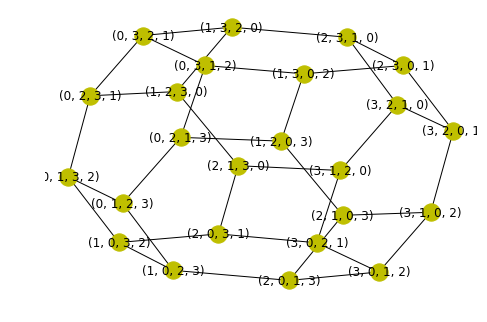

In [32]:
G = action_graph(swaps, one, composition, eq)
nx.draw(G, **opts)

* For example, the action of $S_n$ on trees with vertex set $X$:

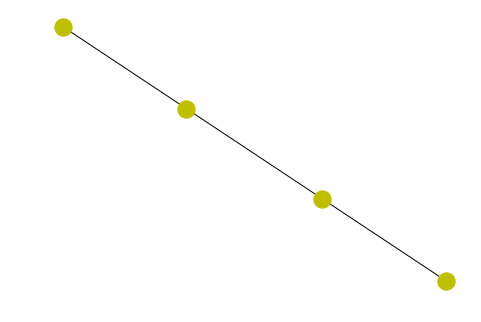

In [33]:
G = action_graph(swaps, T, relabel, are_equal_as_graphs)
nx.draw(G, **opts)

![4-trees](images/t4-action.png)

### Transversal tree

* A **transversal** is a list of group elements $f_y$, one for each $y$
in the orbit of $x$ such that $f_y(x) = y$ (and where $f_x = e$).

* The next variant `transversal_tree` of BFS computes such a transversal in the form of `"perm"`
attributes of the nodes of a **spanning tree** of the action graph.

* This essentially uses the group to measure the **distance** from $x$.

In [34]:
def transversal_tree(gens, x, action, equals):
    Q, G = init_Q_G(x)
    G.nodes[x]['perm'] = identity(len(gens[0]))
    while not Q.empty():
        y = Q.get()
        for a in gens:
            z = action(a, y)
            w = next((v for v in G.nodes() if equals(v, z)), None)
            if w is None:
                Q.put(z)
                G.add_node(z)
                G.add_edge(y, z)
                G.nodes[z]['perm'] = composition(a, G.nodes[y]['perm'])
    return G

* Applying this to our three example actions, we get:

In [35]:
G = transversal_tree(swaps, 1, apply, eq)
nx.get_node_attributes(G, 'perm')

{1: (0, 1, 2, 3), 0: (1, 0, 2, 3), 2: (0, 2, 1, 3), 3: (0, 3, 1, 2)}

In [36]:
G = transversal_tree(swaps, one, composition, eq)
nx.get_node_attributes(G, 'perm')

{(0, 1, 2, 3): (0, 1, 2, 3),
 (1, 0, 2, 3): (1, 0, 2, 3),
 (0, 2, 1, 3): (0, 2, 1, 3),
 (0, 1, 3, 2): (0, 1, 3, 2),
 (2, 0, 1, 3): (2, 0, 1, 3),
 (1, 0, 3, 2): (1, 0, 3, 2),
 (1, 2, 0, 3): (1, 2, 0, 3),
 (0, 3, 1, 2): (0, 3, 1, 2),
 (0, 2, 3, 1): (0, 2, 3, 1),
 (2, 1, 0, 3): (2, 1, 0, 3),
 (3, 0, 1, 2): (3, 0, 1, 2),
 (2, 0, 3, 1): (2, 0, 3, 1),
 (1, 3, 0, 2): (1, 3, 0, 2),
 (0, 3, 2, 1): (0, 3, 2, 1),
 (1, 2, 3, 0): (1, 2, 3, 0),
 (3, 1, 0, 2): (3, 1, 0, 2),
 (3, 0, 2, 1): (3, 0, 2, 1),
 (2, 1, 3, 0): (2, 1, 3, 0),
 (2, 3, 0, 1): (2, 3, 0, 1),
 (1, 3, 2, 0): (1, 3, 2, 0),
 (3, 2, 0, 1): (3, 2, 0, 1),
 (3, 1, 2, 0): (3, 1, 2, 0),
 (2, 3, 1, 0): (2, 3, 1, 0),
 (3, 2, 1, 0): (3, 2, 1, 0)}

In [37]:
G = transversal_tree(swaps, T, relabel, are_equal_as_graphs)
nx.get_node_attributes(G, 'perm')

{<networkx.classes.graph.Graph at 0x104c30b10>: (0, 1, 2, 3),
 <networkx.classes.graph.Graph at 0xa16a0b1d0>: (1, 0, 2, 3),
 <networkx.classes.graph.Graph at 0xa16a0b150>: (2, 0, 1, 3),
 <networkx.classes.graph.Graph at 0xa167b97d0>: (3, 0, 1, 2)}

### Automorphisms.

* The stabilizer $S(x)$ of a point $x \in X$ is generated by loops in
the action graph.

* More precisely, there is the following theorem, aka 
[Schreier's subgroup lemma](https://en.wikipedia.org/wiki/Schreier%27s_lemma).

<div class="alert alert-danger">

**Theorem.**
Suppose a group $S$, generated by a set $A$,
acts on a set $X$ and that $\{f_y : y \in S(x)\}$ is a transversal
of the orbit of $x \in X$.  Then
$$
\{f_{a(y)}^{-1} \circ a \circ f_y: a \in A,\, y \in S(x)\}
$$
is a set of generators for the stabilizer $S_x$.
</div>

In [38]:
def automorphisms(gens, x, action, equals):
    Q, G = init_Q_G(x)
    G.nodes[x]['perm'] = identity(len(gens[0]))
    autos = set()
    while not Q.empty():
        y = Q.get()
        for a in gens:
            z = action(a, y)
            w = next((v for v in G.nodes() if equals(v, z)), None)
            if w is None:
                Q.put(z)
                G.add_node(z)
                G.add_edge(y, z)
                G.nodes[z]['perm'] = composition(a, G.nodes[y]['perm'])
            else:
                perm = composition(a, G.nodes[y]['perm'])
                loop = composition(inverse(G.nodes[w]['perm']), perm)
                autos.add(loop)
    return list(autos)

* For example, $S_n$ acting on $\{0,\dots,n{-}1\}$:

In [39]:
aut = automorphisms(swaps, 1, apply, eq)
aut

[(2, 1, 0, 3), (0, 1, 3, 2), (0, 1, 2, 3)]

In [40]:
orbit(aut, one, composition, eq)

[(0, 1, 2, 3),
 (2, 1, 0, 3),
 (0, 1, 3, 2),
 (3, 1, 0, 2),
 (2, 1, 3, 0),
 (3, 1, 2, 0)]

* For example, $S_n$ acting by composition (multiplication) on itself:

In [41]:
aut = automorphisms(swaps, one, composition, eq)
aut

[(0, 1, 2, 3)]

* For example, $S_n$ acting on $n$-trees:

In [42]:
aut = automorphisms(swaps, T, relabel, are_equal_as_graphs)
aut

[(0, 1, 2, 3), (0, 1, 3, 2), (0, 2, 1, 3)]

In [43]:
orbit(aut, one, composition, eq)

[(0, 1, 2, 3),
 (0, 1, 3, 2),
 (0, 2, 1, 3),
 (0, 2, 3, 1),
 (0, 3, 1, 2),
 (0, 3, 2, 1)]

###  Unlabelled Trees

* With these algorithms, the sizes of the orbits $S(T)$
and the automorphism groups $\mathrm{Aut}(T)$ of both unlabelled
trees on $4$ points can be determined as follows:
![unlabelled 4-trees](images/t4-unlabelled.png)

* Note how the product of the two numbers in each row is $24 = 4!$
(Orbit-Stabilizer Theorem).
* Note how the sum of the orbit lengths in the last column is $16 = 4^{4-2}$
(Cayley's Formula).

### A Bigger Tree

* Finally, let's try a slightly bigger tree:

In [44]:
n = 6
swaps6 = [transposition(n, k) for k in range(n-1)]

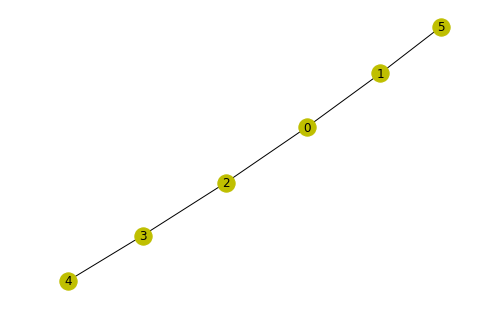

In [45]:
T = nx.random_tree(n)
nx.draw(T, **opts)

In [46]:
aut = automorphisms(swaps6, T, relabel, are_equal_as_graphs)
aut

[(0, 1, 2, 3, 4, 5), (2, 3, 0, 1, 5, 4)]

In [47]:
orbit(aut, identity(n), composition, eq)

[(0, 1, 2, 3, 4, 5), (2, 3, 0, 1, 5, 4)]

* There are more efficient ways to compute automorphism groups of graphs ...

##  Code Corner

### `python`

* `tuple`: [[doc]](https://docs.python.org/3/library/stdtypes.html#typesseq-tuple)


* `dict`: [[doc]](https://docs.python.org/3/library/stdtypes.html#typesmapping)


* `set`: [[doc]](https://docs.python.org/3/library/stdtypes.html#types-set)


* `next`: [[doc]](https://docs.python.org/3/library/functions.html#next)


* `enumerate`: [[doc]](https://docs.python.org/3/library/functions.html#enumerate)

### `networkx`

* `path_graph`: [[doc]](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.path_graph.html)


* `has_node`: [[doc]](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.has_node.html)


* `has_edge`: [[doc]](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.has_edge.html)


* `relabel_nodes`: [[doc]](https://networkx.github.io/documentation/stable/reference/generated/networkx.relabel.relabel_nodes.html)


* `get_node_attributes`: [[doc]](https://networkx.github.io/documentation/stable/reference/generated/networkx.classes.function.get_node_attributes.html)

## Exercises

1.  How many unlabelled trees are there on $n = 5$ vertices?
   What (sizes) are their automorphism groups?

2. $n = 6$?

3. What is the automorphism group of a **path graph** on $n$ vertices?

4. What is the automorphism group of a **star graph** on $n$ vertices
(with almost all vertices connected to vertex $0$, say)?

5. What is the automorphism group of a [**cycle graph**](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.cycle_graph.html) on $n$ vertices?

6. Compute the automorphism group of the Petersen graph.